In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
games = pd.read_csv('games.csv')

# Find out the dimension of the dataset
print(games.shape)

# Finding the names of the columns available in the dataset
print("Columns/Attributes of the dataset --> ")
print(games.columns)

(81312, 20)
Columns/Attributes of the dataset --> 
Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [3]:
# Get a glimpse of data 

# First few data
print(games.head(5))

# Last few data
print(games.tail(5))

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

In [4]:
# From the above we can know that last few games no one actually played and average rating for those games is 0.
# Hence keeping them before applying ML algo may create some bias in the algorithm

print(games.describe())

# We can see that min of yearpublished is -3500 which means some inconsistent data is there.

                  id  yearpublished    minplayers    maxplayers   playingtime  \
count   81312.000000   81309.000000  81309.000000  81309.000000  81309.000000   
mean    72278.150138    1806.630668      1.992018      5.637703     51.634788   
std     58818.237742     588.517834      0.931034     56.076890    345.699969   
min         1.000000   -3500.000000      0.000000      0.000000      0.000000   
25%     21339.750000    1984.000000      2.000000      2.000000      8.000000   
50%     43258.000000    2003.000000      2.000000      4.000000     30.000000   
75%    128836.500000    2010.000000      2.000000      6.000000     60.000000   
max    184451.000000    2018.000000     99.000000  11299.000000  60120.000000   

        minplaytime   maxplaytime        minage   users_rated  average_rating  \
count  81309.000000  81309.000000  81309.000000  81312.000000    81312.000000   
mean      49.276833     51.634788      6.983975    161.886585        4.212144   
std      334.483934    345.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183C840CBE0>]],
      dtype=object)

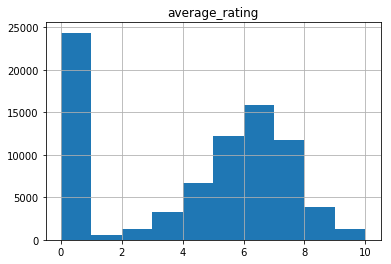

In [5]:
# Plotting a histogram of average_rating

games.hist('average_rating')

In [6]:
# As we can see a lot of games do not have any rating. So we will not consider those games.
# If we try to see why average_rating is 0 it may give some more info about it and we will compare it with a game that has 
# good rating

# Get a game with average_rating 0
print(games[games['average_rating'] == 0].iloc[0])

print()

# Get a game with average_rating more than 0
print(games[games['average_rating'] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime         

In [7]:
games[games['yearpublished'] < 0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
70,188,boardgame,Go,-2200.0,2.0,2.0,90.0,90.0,90.0,8.0,9654,7.70531,7.46289,12784,223,129,1016,2820,1140,3.9491
917,2397,boardgame,Backgammon,-3000.0,2.0,2.0,30.0,30.0,30.0,8.0,7745,6.51582,6.38733,10578,102,11,109,2270,782,2.0332
1870,188,boardgame,Go,-2200.0,2.0,2.0,90.0,90.0,90.0,8.0,9654,7.70531,7.46289,12784,223,129,1016,2820,1140,3.9491
2717,2397,boardgame,Backgammon,-3000.0,2.0,2.0,30.0,30.0,30.0,8.0,7745,6.51582,6.38733,10578,102,11,109,2270,782,2.0332
6284,2399,boardgame,Senet,-3500.0,2.0,2.0,30.0,30.0,30.0,6.0,408,5.91244,5.62977,803,39,12,74,212,55,1.5091
11841,1602,boardgame,The Royal Game of Ur,-2500.0,2.0,2.0,30.0,30.0,30.0,10.0,255,5.44796,5.46245,605,47,3,36,117,32,1.3125
12189,19915,boardgame,Three Men's Morris,-1400.0,2.0,2.0,5.0,5.0,5.0,5.0,36,4.41694,5.44396,38,0,0,4,19,8,1.3750
12718,3886,boardgame,Nine Men's Morris,-1400.0,2.0,2.0,20.0,20.0,20.0,6.0,805,5.30249,5.37450,1012,26,3,35,297,101,1.8713
12908,5546,boardgame,Marbles,-3000.0,0.0,0.0,10.0,10.0,10.0,4.0,320,4.73994,5.25482,260,1,0,2,130,44,1.1136
13033,5432,boardgame,Snakes and Ladders,-200.0,2.0,6.0,30.0,30.0,30.0,3.0,2182,2.76805,3.40417,2062,34,3,26,852,232,1.0086


In [8]:
# Keep the games in which atleast one user has provided some rating
games = games[games['users_rated'] > 0]
print(games.shape)

(56932, 20)


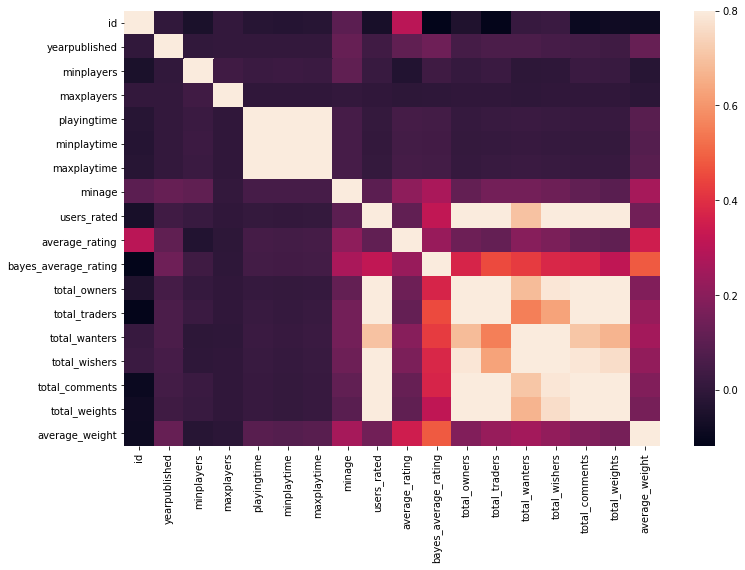

In [9]:
# Find out correlation of the columns
games_corr = games.corr()

# Plot the correlation in seaborn heatmap
plt.figure(figsize = (12,8))
sns.heatmap(games_corr,vmax = 0.8)
plt.show()

In [12]:
# From the above heatmap we can see that id has more correlation with average_rating but that will not give much information 
# about the average rating. Similarly type of board game are not going to give much information about 
# it but average_weight(probably the complexity of the game kind of important for average_rating)

# We need to remove some columns from the existing dataset like id,type,yearpublished etc.

columns = games.columns.tolist()

columns = [c for c in columns if c not in ['id','yearpublished','bayes_average_rating','average_rating','type','name']]

target = "average_rating"

In [13]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [14]:
# If any missing values present in the dataset I am going to remove that
print(games.shape)
games = games.dropna(axis = 0)
print(games.shape)

(56932, 20)
(56894, 20)


In [15]:
# Split the data 
from sklearn.model_selection import train_test_split

games_modified = games[columns]
games_rating = games[target]

print(games_modified.shape)
print(games_rating.shape)

(56894, 14)
(56894,)


In [16]:
games_train,games_test,rating_train,rating_test = train_test_split(games_modified,games_rating,test_size = 0.25,
                                                                   random_state = 42)

print(games_train.shape)
print(games_test.shape)
print(rating_train.shape)
print(rating_test.shape)

(42670, 14)
(14224, 14)
(42670,)
(14224,)


In [17]:
# Now utilize linear regression model
rating_train.values.reshape(1,-1)
rating_test.values.reshape(1,-1)
LR = LinearRegression()
LR.fit(games_train,rating_train)

rating_predicted = LR.predict(games_test)

# mean squared error 
mean_squared_error(rating_test,rating_predicted)

2.0908519747309247

In [18]:
games_train.isnull().values.any()

False

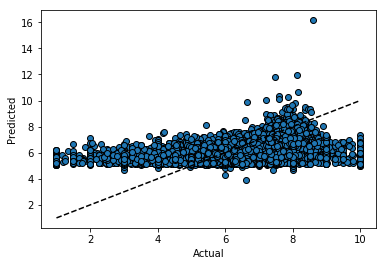

In [19]:
# Plotting rating_predicted and actual_rating
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

predicted = cross_val_predict(LR, games_test, rating_test, cv=10)

fig,ax = plt.subplots()
ax.scatter(rating_test,predicted,edgecolors = (0,0,0))
ax.plot([rating_test.min(),rating_test.max()],[rating_test.min(),rating_test.max()],'k--')
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
plt.show()

In [22]:
# Now utilize random forest regressor

RFR = RandomForestRegressor(n_estimators = 100,min_samples_leaf = 10,random_state = 42)
RFR.fit(games_train,rating_train)

rating_predicted = RFR.predict(games_test)

# mean squared error 
mean_squared_error(rating_test,rating_predicted)

1.5621274350807892

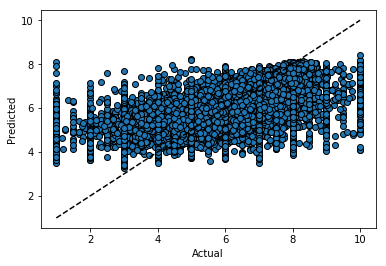

In [23]:
predicted = cross_val_predict(RFR, games_test, rating_test, cv=10)

fig,ax = plt.subplots()
ax.scatter(rating_test,predicted,edgecolors = (0,0,0))
ax.plot([rating_test.min(),rating_test.max()],[rating_test.min(),rating_test.max()],'k--')
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
plt.show()

In [ ]:
# Now we will try to predict a game review for which we are going to choose a data from our train set and let's apply both 
# these algorithms to see their prediction and we will compare it with the original result

games.iloc[10]

In [ ]:
games_train_sample = games_train.iloc[10].values.reshape(1,-1)
rating_sample = rating_train.iloc[10]

print(games_train_sample)
print(rating_sample)

In [ ]:
print("Linear Regression Predicted:{}".format(LR.predict(games_train_sample)))
print("Random Forest Regressor Predicted:{}".format(RFR.predict(games_train_sample)))

In [ ]:
import random

rand_num = random.randint(1,games_train.shape[0])
print("Random Number Generated is {}".format(rand_num))

games_train_sample = games_train.iloc[rand_num].values.reshape(1,-1)
rating_sample = rating_train.iloc[rand_num]

print(games_train_sample)
print(rating_sample)

print("Linear Regression Predicted:{}".format(LR.predict(games_train_sample)))
print("Random Forest Regressor Predicted:{}".format(RFR.predict(games_train_sample)))

In [ ]:
games[games['average_rating'] == 10].shape